<a href="https://colab.research.google.com/github/21-501/ds1/blob/main/final_firstproject_4thyear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Importing Libraries
2.   Loading dataset
3.   Data preprocessing
4.Exploratory Data Analysis


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Fraud_dataset.csv", on_bad_lines="skip")


In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:


print('Number of fraudulent transactions \t: {}'.format(df['isFraud'].sum()))
print('Number of non-fraudulent transactions \t: {}'.format(len(df[df['isFraud']==0])))
print('\nNumber of transactions flagged fraud \t: {}'.format(len(df[df['isFlaggedFraud']==1])))
print('Number of transactions flagged non-fraud: {}'.format(len(df[df['isFlaggedFraud']==0])))

Number of fraudulent transactions 	: 8213
Number of non-fraudulent transactions 	: 6354407

Number of transactions flagged fraud 	: 16
Number of transactions flagged non-fraud: 6362604


In [ ]:
# Merchants
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [ ]:

fraud_ratio = df['isFraud'].value_counts()/len(df)
flaggedFraud_ratio =  df['isFlaggedFraud'].value_counts()/len(df)

In [ ]:

print(f'Fraud ratio \n{fraud_ratio} \n\nFlagged fraud ratio \n{flaggedFraud_ratio}')

Fraud ratio 
isFraud
0    0.998709
1    0.001291
Name: count, dtype: float64 

Flagged fraud ratio 
isFlaggedFraud
0    0.999997
1    0.000003
Name: count, dtype: float64


In [ ]:

df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
fraudby_type = df.groupby(['type', 'isFraud']).size().unstack(fill_value=0)
flaggedFraudby_type = df[df['isFlaggedFraud']==1].groupby('type')['isFlaggedFraud'].count()


In [ ]:
print(f'Fraud per transaction type: \n{fraudby_type}\n \nFlagged fraud per transaction type: \n{flaggedFraudby_type}')


Fraud per transaction type: 
isFraud         0     1
type                   
CASH_IN   1399284     0
CASH_OUT  2233384  4116
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   528812  4097
 
Flagged fraud per transaction type: 
type
TRANSFER    16
Name: isFlaggedFraud, dtype: int64


In [ ]:
df[df['isFraud']==1].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,8213.000000,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8213.0,8213.000000
mean,368.413856,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06,1.0,0.001948
std,216.388690,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06,0.0,0.044097
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,181.000000,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
50%,367.000000,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03,1.0,0.000000
75%,558.000000,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06,1.0,0.000000
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0,1.000000


In [ ]:
len(df[(df['amount'] == df['oldbalanceOrg'])])

8034

In [ ]:
len(df[(df['amount'] == df['oldbalanceOrg']) & (df['isFraud'] == 1)] )

8034

In [ ]:

df_outliers = df[(df['amount'] != df['oldbalanceOrg']) & (df['isFraud'] == 1)]

In [ ]:

df_outliers.groupby('type')['type'].count()

,type
type,
CASH_OUT,25
TRANSFER,154


In [ ]:
df_outliers[df_outliers['type'] == 'CASH_OUT'].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,25.000000,25.000000,25.000000,25.0000,2.500000e+01,2.500000e+01,25.0,25.0
mean,56.880000,220121.416800,17031.663200,11950.7044,5.806669e+05,1.185674e+06,1.0,0.0
std,78.015127,158136.453984,69138.559766,59753.5220,1.613350e+06,2.341533e+06,0.0,0.0
min,1.000000,23292.300000,0.000000,0.0000,0.000000e+00,4.061122e+04,1.0,0.0
25%,13.000000,95428.320000,0.000000,0.0000,0.000000e+00,2.250277e+05,1.0,0.0
50%,19.000000,181728.110000,0.000000,0.0000,1.139700e+04,4.070058e+05,1.0,0.0
75%,38.000000,314251.580000,0.000000,0.0000,3.989313e+05,6.784196e+05,1.0,0.0
max,231.000000,577418.980000,340830.430000,298767.6100,7.962205e+06,9.291620e+06,1.0,0.0


In [ ]:


df_outliers[df_outliers['type'] == 'TRANSFER'].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,154.000000,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,154.0,154.000000
mean,439.097403,9.565122e+06,1.928838e+07,1.006063e+07,2.855618e+04,5.909128e+04,1.0,0.038961
std,213.665941,1.919552e+06,1.081729e+07,1.032873e+07,2.048429e+05,3.562933e+05,0.0,0.194133
min,4.000000,1.231949e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,271.500000,1.000000e+07,1.227122e+07,2.455224e+06,0.000000e+00,0.000000e+00,1.0,0.000000
50%,425.000000,1.000000e+07,1.595579e+07,6.359678e+06,0.000000e+00,0.000000e+00,1.0,0.000000
75%,646.000000,1.000000e+07,2.370846e+07,1.493847e+07,0.000000e+00,0.000000e+00,1.0,0.000000
max,741.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.122337e+06,3.217684e+06,1.0,1.000000


In [ ]:


df[df['isFlaggedFraud'] == 1].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16.000000,1.600000e+01,1.600000e+01,1.600000e+01,16.0,16.0,16.0,16.0
mean,537.562500,4.861598e+06,7.817869e+06,7.817869e+06,0.0,0.0,1.0,1.0
std,181.895196,3.572499e+06,6.972669e+06,6.972669e+06,0.0,0.0,0.0,0.0
min,212.000000,3.538742e+05,3.538742e+05,3.538742e+05,0.0,0.0,1.0,1.0
25%,415.500000,2.242749e+06,3.013980e+06,3.013980e+06,0.0,0.0,1.0,1.0
50%,601.500000,4.234245e+06,4.923043e+06,4.923043e+06,0.0,0.0,1.0,1.0
75%,678.750000,7.883451e+06,1.212835e+07,1.212835e+07,0.0,0.0,1.0,1.0
max,741.000000,1.000000e+07,1.958504e+07,1.958504e+07,0.0,0.0,1.0,1.0


In [ ]:
len(df[  (df['oldbalanceOrg'] == df['newbalanceOrig']) \
       & (df['oldbalanceDest'] == df['newbalanceDest']) \
       & (df['amount']>200.000) \
       & (df['type']=='TRANSFER') ])

21

In [ ]:

len(df[df['isFlaggedFraud'] == 1])

16

In [ ]:
dff_outliers = df[  (df['oldbalanceOrg'] == df['newbalanceOrig']) \
       & (df['oldbalanceDest'] == df['newbalanceDest']) \
       & (df['amount']>200.000) \
       & (df['type']=='TRANSFER') \
       & (df['isFlaggedFraud']==0)]
dff_outliers.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.00000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0
mean,16.80000,237475.474000,0.0,0.0,0.0,0.0,0.0,0.0
std,16.11521,161578.156092,0.0,0.0,0.0,0.0,0.0,0.0
min,1.00000,18931.590000,0.0,0.0,0.0,0.0,0.0,0.0
25%,12.00000,133711.480000,0.0,0.0,0.0,0.0,0.0,0.0
50%,12.00000,271161.740000,0.0,0.0,0.0,0.0,0.0,0.0
75%,15.00000,342317.150000,0.0,0.0,0.0,0.0,0.0,0.0
max,44.00000,421255.410000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df[df['nameOrig'].str.startswith('M')].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Preprocessing

In [ ]:
import numpy as np
df.loc[df['nameDest'].str.startswith('M'), ['oldbalanceDest']] = np.NaN
print('{} rows updated with NaN'.format(df['oldbalanceDest'].isnull().sum()))

2151495 rows updated with NaN


In [ ]:
df=df.interpolate()

<ipython-input-79-4284aa25ba53>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df=df.interpolate()


In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,NaN,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,NaN,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.000000e+00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,2.118200e+04,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,2.463467e+04,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.000000e+00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.000000e+00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,6.848884e+04,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.000000e+00,0.00,1,0


In [ ]:
fraud_count = (df['isFraud'] == 1).sum()
print(fraud_count)


8213


In [ ]:
df[df['oldbalanceDest'].isnull()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,NaN,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,NaN,0.0,0,0


In [ ]:


df.loc[df['oldbalanceDest'].isnull(), 'oldbalanceDest'] = 0

In [ ]:
df.isnull().values.any()

False

In [ ]:
df[(df['type']=='PAYMENT') & (df.nameDest.str.get(0) != 'M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
newbalanceDest = df.loc[df.nameDest.str.get(0) == 'M', 'oldbalanceDest'] + df.loc[df.nameDest.str.get(0) == 'M','amount']


In [ ]:
df.loc[df['nameDest'].str.get(0) == 'M', ['newbalanceDest']] = newbalanceDest


In [ ]:
len(df[(df['nameDest'].str.get(0) == 'M') & (df['amount'] == df['oldbalanceOrg'])])


0

In [ ]:

df[df['nameDest'].str.get(0) == 'M'].describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2151495.0,2151495.0
mean,2.443782e+02,1.305760e+04,6.821683e+04,6.183789e+04,1.161337e+06,1.174395e+06,0.0,0.0
std,1.426951e+02,1.255645e+04,1.989911e+05,1.969915e+05,2.614824e+06,2.614912e+06,0.0,0.0
min,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-02,0.0,0.0
25%,1.560000e+02,4.383820e+03,0.000000e+00,0.000000e+00,1.105357e+05,1.240366e+05,0.0,0.0
50%,2.490000e+02,9.482190e+03,1.053000e+04,0.000000e+00,4.304567e+05,4.436661e+05,0.0,0.0
75%,3.350000e+02,1.756122e+04,6.088300e+04,4.965413e+04,1.266756e+06,1.279647e+06,0.0,0.0
max,7.180000e+02,2.386380e+05,4.368662e+07,4.367380e+07,3.368401e+08,3.368669e+08,0.0,0.0


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.493403e+06,1.622113e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.647435e+06,3.891930e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,1.271562e+05,1.814925e+05,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,5.065537e+05,5.929597e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,1.533432e+06,1.678439e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Remove Unwanted data

In [ ]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


Data Visualization

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

<ipython-input-97-af8d2cbb10b5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette="viridis")


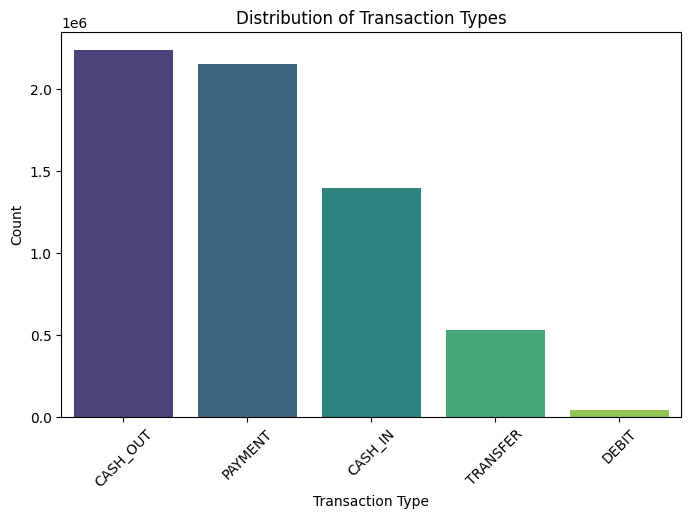

In [ ]:
# Count occurrences of each transaction type
transaction_counts = df["type"].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette="viridis")

# Labels and title
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Distribution of Transaction Types")
plt.xticks(rotation=45)
plt.show()


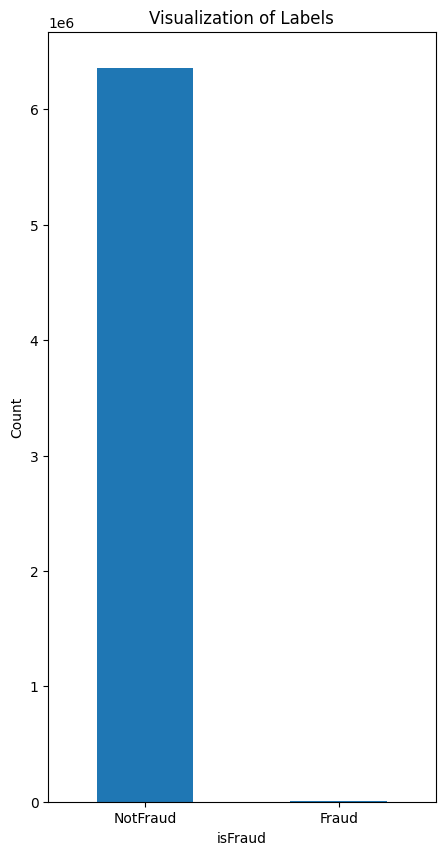

In [ ]:
plt.figure(figsize=(5,10))
labels = ["NotFraud", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

<ipython-input-95-0d279be3b46e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.step, fit=norm)


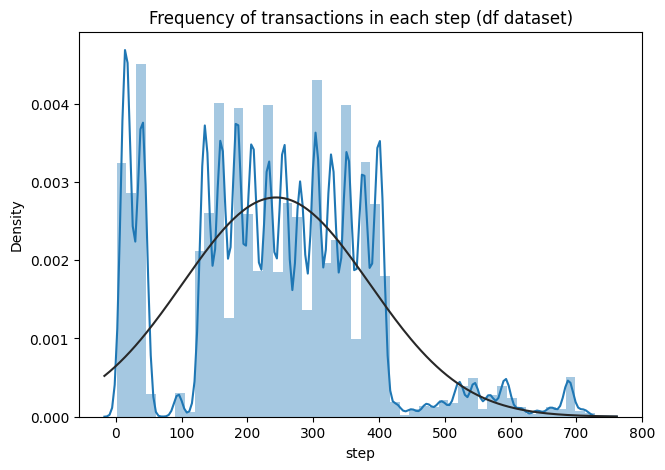

In [ ]:


plt.rcParams['figure.figsize'] =(16, 5)

plt.subplot(1, 2, 1)
sns.distplot(df.step, fit=norm)
plt.title('Frequency of transactions in each step (df dataset)', fontsize = 12)
plt.show()

<ipython-input-96-ebef23f324ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud',y='step',data=df, palette='Pastel1')
<ipython-input-96-ebef23f324ea>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFlaggedFraud',y='step',data=df, palette='Pastel1')


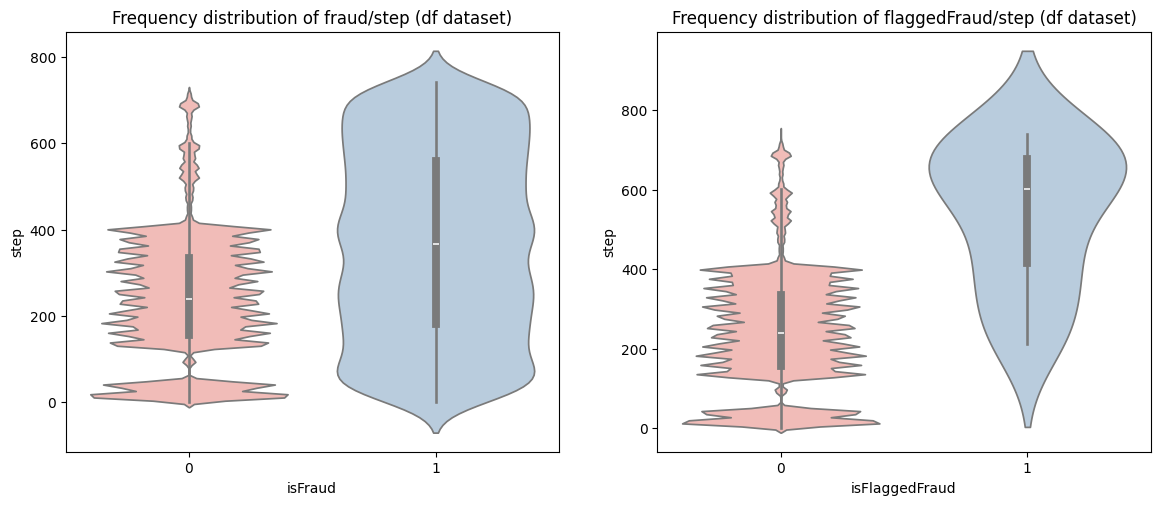

In [ ]:
plt.rcParams['figure.figsize'] =(14, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x='isFraud',y='step',data=df, palette='Pastel1')
plt.title('Frequency distribution of fraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x='isFlaggedFraud',y='step',data=df, palette='Pastel1')
plt.title('Frequency distribution of flaggedFraud/step (df dataset)', fontsize = 12)
plt.show()



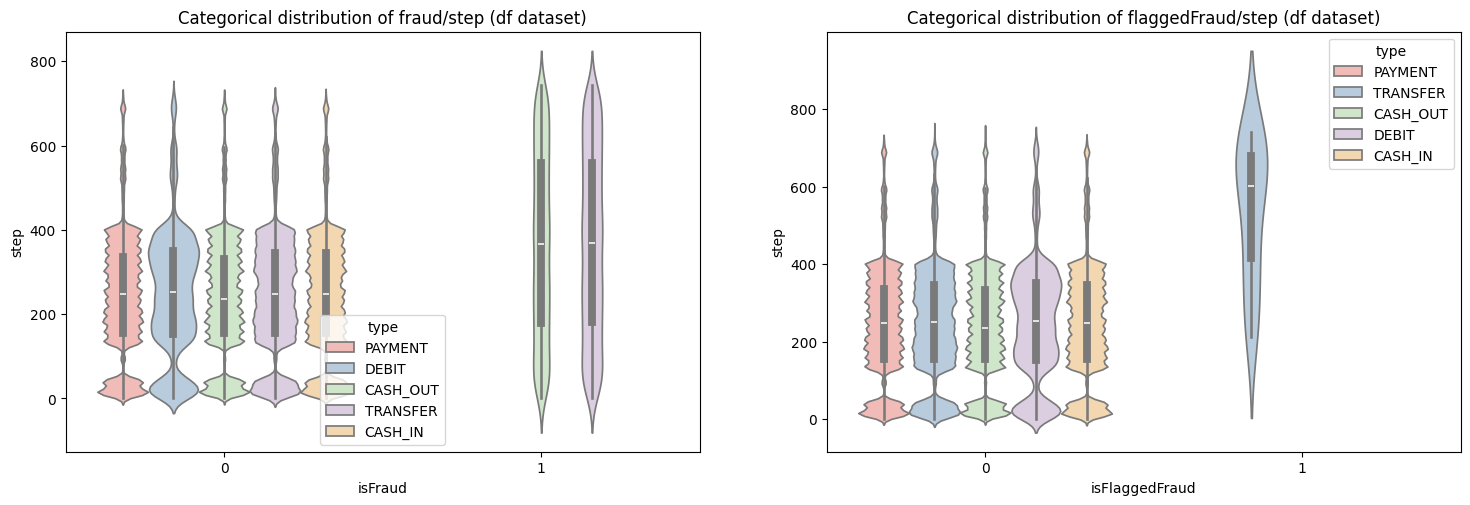

In [ ]:
plt.rcParams['figure.figsize'] =(18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x='isFraud',y='step',data=df, hue='type', palette='Pastel1')
plt.title('Categorical distribution of fraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x='isFlaggedFraud',y='step',data=df, hue='type', palette='Pastel1')
plt.title('Categorical distribution of flaggedFraud/step (df dataset)', fontsize = 12)

plt.show()

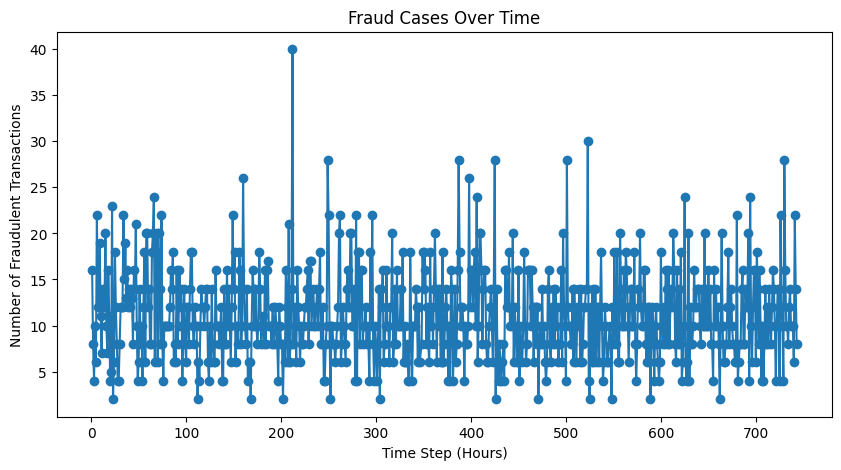

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count fraud cases per step
fraud_counts = df[df['isFraud'] == 1]['step'].value_counts().sort_index()

# Plot fraud distribution over time
plt.figure(figsize=(10, 5))
plt.plot(fraud_counts.index, fraud_counts.values, marker='o', linestyle='-')
plt.xlabel('Time Step (Hours)')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraud Cases Over Time')
plt.show()
